<a href="https://colab.research.google.com/github/catturtle123/LA3/blob/main/ex02_transform_tiefighter_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [860]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [861]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [862]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [863]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

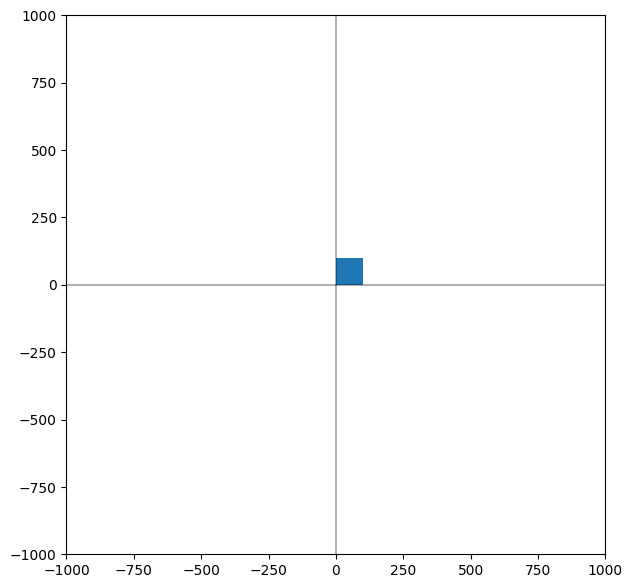

In [864]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [865]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [866]:
def scale(p,sx,sy):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

In [867]:
def rotate(p,theta):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[theta, -theta, 0.0], [theta, theta, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

In [868]:
def shear_x(p, sx):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

In [869]:
def shear_y(p, sy):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

In [870]:
def reflect_x(p):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

In [871]:
def reflect_y(p):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [872]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)
  
  # 2. 크기 변환: S(5, 5)
  s = 5.5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  draw_rectangle(ax, q1, q2, q3, q4)
  
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)
 
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  

  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)
  

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [873]:
def draw_left_arm(ax,p1, p2, p3, p4):

  s = 2
  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s)
  q4 = scale(p4, s, s)

  shear = 3.5
  q1 = shear_x(q1, shear)
  q2 = shear_x(q2, shear)
  q3 = shear_x(q3, shear)
  q4 = shear_x(q4, shear)

  t = 750
  q1 = translate(q1, -t,0)
  q2 = translate(q2, -t,0)
  q3 = translate(q3, -t,0)
  q4 = translate(q4, -t,0)

  draw_rectangle(ax, q1, q2, q3, q4)


  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s)
  q4 = scale(p4, s, s)

  q1 = shear_x(q1, shear)
  q2 = shear_x(q2, shear)
  q3 = shear_x(q3, shear)
  q4 = shear_x(q4, shear)

  q1 = translate(q1, -t,0)
  q2 = translate(q2, -t,0)
  q3 = translate(q3, -t,0)
  q4 = translate(q4, -t,0)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [874]:
def draw_left_wing(ax,p1, p2, p3, p4):
  s = 3
  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s+2)
  q4 = scale(p4, s, s*2+2)

  t = 900
  q1 = translate(q1, -t,0)
  q2 = translate(q2, -t,0)
  q3 = translate(q3, -t,0)
  q4 = translate(q4, -t,0)

  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s+2)
  q4 = scale(p4, s, s*2+2)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  t = 900
  q1 = translate(q1, -t,0)
  q2 = translate(q2, -t,0)
  q3 = translate(q3, -t,0)
  q4 = translate(q4, -t,0)

  draw_rectangle(ax, q1, q2, q3, q4)

In [875]:
def draw_right_arm(ax,p1, p2, p3, p4):
  s = 2
  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s)
  q4 = scale(p4, s, s)

  shear = -3.5
  q1 = shear_x(q1, shear)
  q2 = shear_x(q2, shear)
  q3 = shear_x(q3, shear)
  q4 = shear_x(q4, shear)

  t = 550
  q1 = translate(q1, t,0)
  q2 = translate(q2, t,0)
  q3 = translate(q3, t,0)
  q4 = translate(q4, t,0)

  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s)
  q4 = scale(p4, s, s)

  q1 = shear_x(q1, shear)
  q2 = shear_x(q2, shear)
  q3 = shear_x(q3, shear)
  q4 = shear_x(q4, shear)

  q1 = translate(q1, t,0)
  q2 = translate(q2, t,0)
  q3 = translate(q3, t,0)
  q4 = translate(q4, t,0)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [876]:
def draw_right_wing(ax,p1, p2, p3, p4):
  s = 3
  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s*2+2)
  q4 = scale(p4, s, s+2)

  t = 600
  q1 = translate(q1, t,0)
  q2 = translate(q2, t,0)
  q3 = translate(q3, t,0)
  q4 = translate(q4, t,0)

  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s*2+2)
  q4 = scale(p4, s, s+2)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  q1 = translate(q1, t,0)
  q2 = translate(q2, t,0)
  q3 = translate(q3, t,0)
  q4 = translate(q4, t,0)

  draw_rectangle(ax, q1, q2, q3, q4)

In [877]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)
 
  draw_left_arm(ax,p1, p2, p3, p4) # 왼쪽 날개축
  
  draw_left_wing(ax,p1, p2, p3, p4) # 왼쪽 날개
  
  draw_right_arm(ax,p1, p2, p3, p4) # 오른쪽 날개축
  
  draw_right_wing(ax,p1, p2, p3, p4) # 오른쪽 날개
  

### 3. main

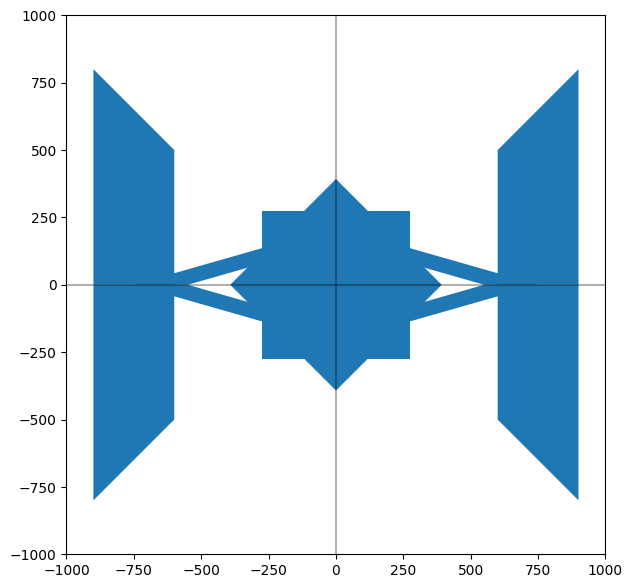

In [878]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()